# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn 관련
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드하기

In [ ]:
df_stroke = pd.read_csv('/content/drive/MyDrive/data/stroke/train.csv')

In [ ]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
df_stroke.shape

(15304, 12)

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


* 15304개의 데이터로 구성되어 있고 12개의 컬럼으로 이루어져 있다.
* 결측값은 없는 것으로 보여진다.
* 변수 설명
    * id : 회원 아이디 번호
    * gender : 성별 -> Female - 여성 / Male - 남성
    * age : 나이 -> 0.08 ~ 82세
    * hypertension : 고혈압 -> 0 - 고혈압 x / 1 - 고혈압 o
    * heart_disease : 심장 질환 -> 0 - 심장 질환 x / 1 - 심장 질환 o
    * ever_married : 결혼 유무 -> Yes - 결혼o / No - 결혼 x
    * work_type : 작업 유형 -> Private : ? / children : 어린이 / Self-employed : 자영업자 / Govt_job : 공무원 / Never_worked : 직업 x
    * Residence_type : 거주 유형 -> Rural : 시골 거주 / Urban : 도시 거주
    * avg_glucose_level : 평균 포도당 수치 -> 55.2 ~ 267.6
    * bmi : 체질량지수 -> 10.3 ~ 80.1
    * smoking_status : 흡연 유무 -> never smoked : 흡연 x / formerly smoked : 금연 / smokes : 흡연 o / Unknown : 결측값
    * stroke : 뇌졸중 유무 -> 0 : 뇌졸중 x / 1 : 뇌졸중 o


---
출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


* 뇌졸중 : 뇌의 일부분에 혈액을 공급하는 혈관이 막히거나(뇌경색) 터짐(뇌출혈)으로써 그 부분의 뇌가 손상되어 나타나느 신경학적 증상을 말합니다. 
* 뇌졸중 주요 원인 
    1. 죽상동맥경화성 혈전증
    2. 색전증
    3. 고혈압성 뇌 내 출혈
    4. 동맥류
    5. 혈관 기형
    6. 동맥염
    7. 혈액 질환
    8. 모야모야병


---


출처 : https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=30518

* 위 변수들 중에서 **고혈압** 변수가 뇌졸중에 큰 영향을 줄 것으로 보인다. 

# 3. 변수 별 시각화하기

## 3.1 stroke (target)

In [ ]:
df_stroke['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

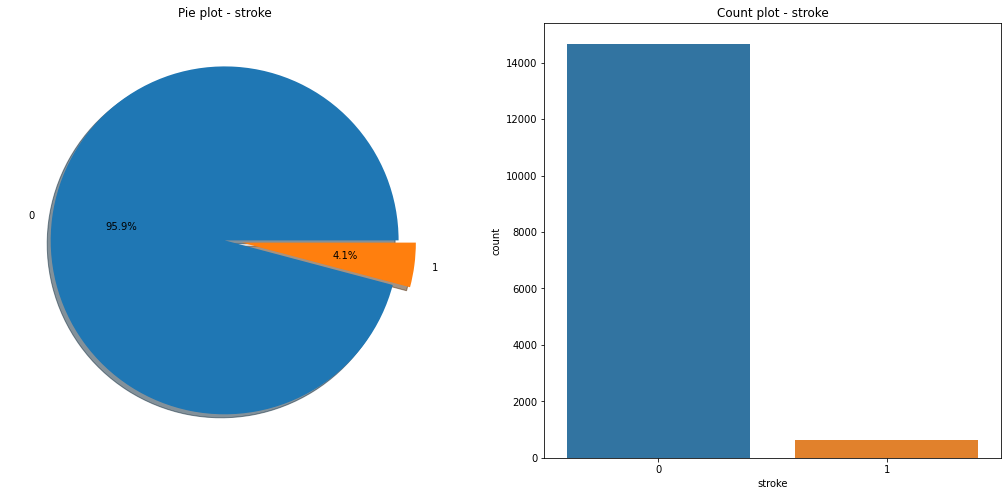

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


df_stroke['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - stroke')
ax[0].set_ylabel('')
sns.countplot('stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Count plot - stroke')

plt.show()

* 뇌졸중이 없는 환자가 15304명 뇌줄중이 있는 환자가 632명입니다.
* 전체 데이터 중 뇌졸중이 있는 환자의 비율은 4.1%입니다.
* 주어진 데이터에 뇌졸중이 있는 환자의 데이터가 많지 않다. 

## 3.2 gender

* 성별에 따라 뇌졸중에 분포는 크게 다르지 않을 것 같다.

In [ ]:
df_stroke['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [ ]:
# 성별이 남자인 데이터
df_male = df_stroke[df_stroke['gender'] == 'Male']
df_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
10,10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,Male,53.0,0,0,Yes,Private,Rural,86.96,32.8,Unknown,0
15289,15289,Male,55.0,0,0,Yes,Govt_job,Urban,55.28,31.5,never smoked,0
15294,15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15295,15295,Male,12.0,0,0,No,children,Urban,69.78,14.3,never smoked,0


In [ ]:
# 성별이 여자인 데이터
df_female = df_stroke[df_stroke['gender'] == 'Female']
df_female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [ ]:
# 성별이 other인 데이터 확인
df_stroke[df_stroke['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


* 성별을 알 수 없는 환자는 9살이고 **뇌졸중이 없는 환자**이다. 
* 성별이 other인 데이터를 어떻게 처리해줘야 할까?
    1. 뇌졸중이 없는 환자 데이터이므로 이미 많기 때문에 지워준다.
    2. 남성 데이터보다 여성 데이터가 많기 때문에 남성이라고 지정해준다.


In [ ]:
df_male['stroke'].value_counts()

0    5593
1     264
Name: stroke, dtype: int64

In [ ]:
df_female['stroke'].value_counts()

0    9078
1     368
Name: stroke, dtype: int64

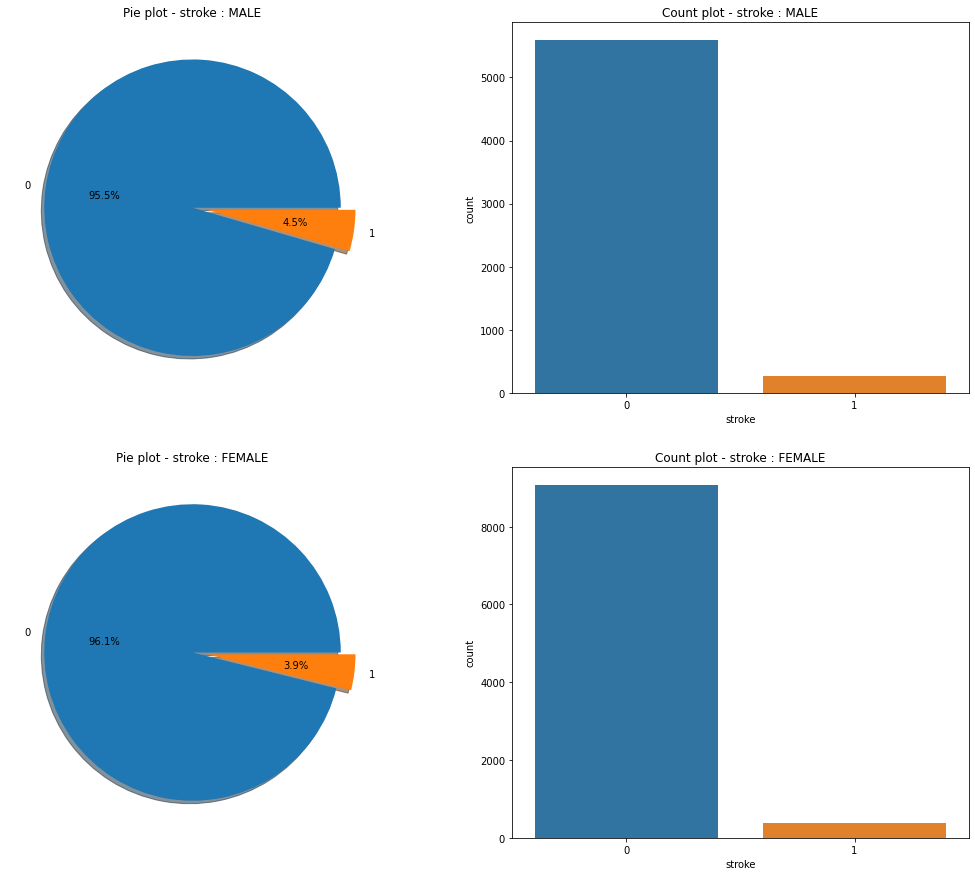

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18,15))


df_male['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0, 0], shadow=True)
ax[0, 0].set_title('Pie plot - stroke : MALE')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_male, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : MALE')

df_female['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : FEMALE')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_female, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : FEMALE')

plt.show()
     

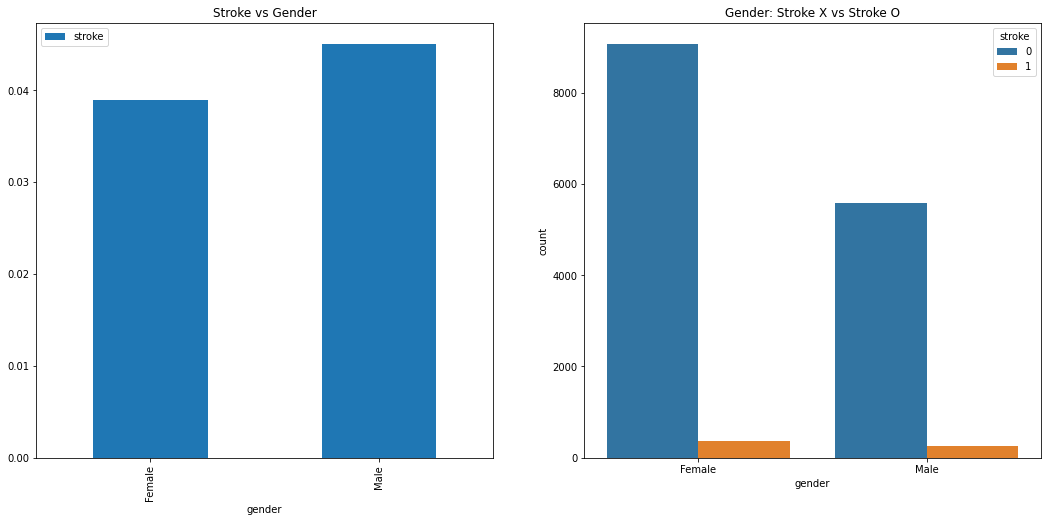

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 성별이 other인 데이터 제외
df_new = df_stroke[df_stroke['gender'] != 'Other']

df_new[['gender', 'stroke']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Gender')
sns.countplot('gender', hue='stroke', data=df_new, order = df_new['gender'].value_counts().index, ax=ax[1])
ax[1].set_title('Gender: Stroke X vs Stroke O')
plt.show()

In [ ]:
df_new[['gender', 'stroke']].groupby(['gender'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,gender,stroke
1,Male,0.045074
0,Female,0.038958


In [ ]:
pd.crosstab(df_new['gender'], df_new['stroke'], margins=True).style.background_gradient(cmap = 'summer_r')

stroke,0,1,All
gender,,,
Female,9078,368,9446
Male,5593,264,5857
All,14671,632,15303


* 총 15304개 데이터
    * 남자 : 5857 -> 264명 뇌졸중 : 4.5%
    * 여자 : 9446 -> 368명 뇌졸중 : 3.9%
    * 알 수 없음 : 1 -> 뇌졸중 X
* **결론 : 성별로 나누기 전과 후의 분포가 크게 다르지 않다.**

## 3.3 age

* 나이가 많을수록 뇌졸중이 있을 확률이 높을 것 같다.

In [ ]:
print('제일 나이 많은 환자 : {:.1f} 세'.format(df_stroke['age'].max()))
print('제일 나이 어린 환자 : {:.1f} 세'.format(df_stroke['age'].min()))
print('환자 평균 나이 : {:.1f} 세'.format(df_stroke['age'].mean()))

제일 나이 많은 환자 : 82.0 세
제일 나이 어린 환자 : 0.1 세
환자 평균 나이 : 41.4 세


In [ ]:
# 0.1세 데이터 확인 -> 0.08세 확인
df_stroke[df_stroke['age'] == 0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3071,3071,Male,0.08,0,0,No,children,Rural,73.33,17.4,Unknown,0
3137,3137,Male,0.08,0,0,No,children,Urban,75.93,14.8,Unknown,0
4155,4155,Female,0.08,0,0,Yes,Private,Urban,79.33,33.2,Unknown,0
4738,4738,Male,0.08,0,0,No,children,Urban,72.01,19.5,Unknown,0
7278,7278,Male,0.08,0,0,No,children,Urban,86.32,16.6,Unknown,0
7579,7579,Male,0.08,0,0,No,children,Rural,80.08,18.1,Unknown,0


* 나이가 0.08세인 환자는 총6명이고 모두 **뇌졸중이 없는 환자**이다. 
* 나이가 0.08세인 데이터를 어떻게 처리해줘야 할까?
    1. 뇌졸중이 없는 환자 데이터이므로 이미 많기 때문에 지워준다.
    2. 0세로 바꿔 표기해줘야한다.


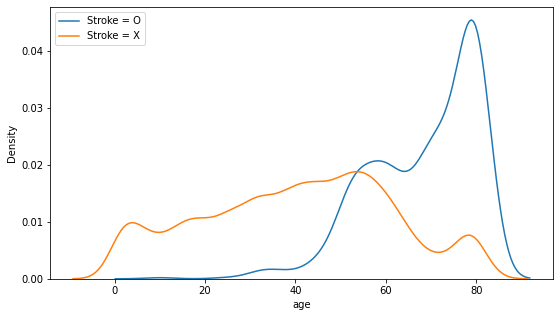

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_stroke[df_stroke['stroke'] == 1]['age'], ax = ax)
sns.kdeplot(df_stroke[df_stroke['stroke'] == 0]['age'], ax = ax)
plt.legend(['Stroke = O', 'Stroke = X'])
plt.show()

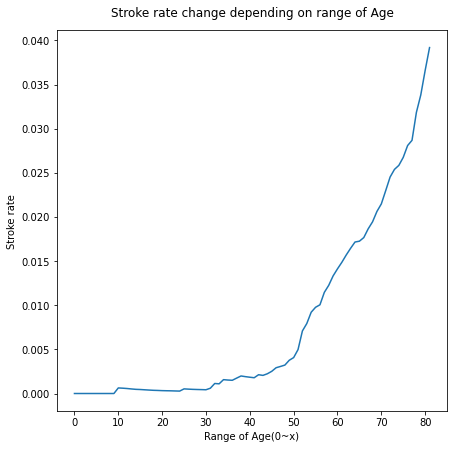

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 83): # 82세가 최대이므로 
    cummulate_survival_ratio.append(df_stroke[df_stroke['age'] < i]['stroke'].sum() / len(df_stroke[df_stroke['age'] < i]['stroke']))
    # 해당 나이까지 뇌졸중인 사람 수 / 해당 나이까지 전체 사람 수
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Stroke rate change depending on range of Age', y=1.02)
plt.ylabel('Stroke rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 많을수록 뇌졸중이 있는 경우가 많다.
* 특히 80세인 경우가 많다.
* 30세 이전에는 뇌졸중이 거의 없는 것으로 나타났다.
* 나이가 많아질 수록 뇌졸중 확률이 확실히 높아진다.
* 나이변수가 뇌졸중을 판단하는데 중요한 변수가 될 것 같다.

In [ ]:
df_stroke[df_stroke['age'] < 83]['stroke'].sum() / len(df_stroke[df_stroke['age'] < 83]['stroke'])

0.041296393099843176

In [ ]:
len(df_stroke[df_stroke['age'] < 83]['stroke'])

15304

In [ ]:
df_stroke[df_stroke['age'] < 83]['stroke'].sum()

632

## 3.4 hypertension

* 고혈압이 있다면 뇌졸중일 확률이 높을 것 같다.

In [ ]:
df_stroke['hypertension'].value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

In [ ]:
# 고혈압이 아닌 사람 데이터
df_hypertension_no = df_stroke[df_stroke['hypertension'] == 0]
df_hypertension_no

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
# 고혈압이 있는 사람 데이터
df_hypertension_yes = df_stroke[df_stroke['hypertension'] == 1]
df_hypertension_yes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43,43,Female,52.0,1,0,Yes,Self-employed,Urban,129.19,35.6,smokes,0
48,48,Female,42.0,1,0,Yes,Self-employed,Urban,59.52,29.0,never smoked,0
51,51,Female,59.0,1,0,Yes,Govt_job,Urban,71.81,27.3,formerly smoked,0
56,56,Female,76.0,1,0,Yes,Self-employed,Urban,82.28,24.3,never smoked,0
57,57,Female,82.0,1,0,Yes,Private,Urban,73.19,33.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15215,15215,Female,58.0,1,0,Yes,Self-employed,Rural,77.99,30.4,never smoked,0
15247,15247,Female,61.0,1,0,Yes,Private,Urban,77.55,29.7,Unknown,0
15253,15253,Male,66.0,1,0,Yes,Self-employed,Rural,205.43,26.3,never smoked,0
15264,15264,Female,81.0,1,0,Yes,Self-employed,Urban,99.33,27.7,never smoked,0


In [ ]:
# 고혈압이 없는 사람들의 뇌졸중 유무 분포
df_hypertension_no['stroke'].value_counts()

0    14039
1      504
Name: stroke, dtype: int64

In [ ]:
# 고혈압이 있는 사람들의 뇌졸중 유무 분포
df_hypertension_yes['stroke'].value_counts()

0    633
1    128
Name: stroke, dtype: int64

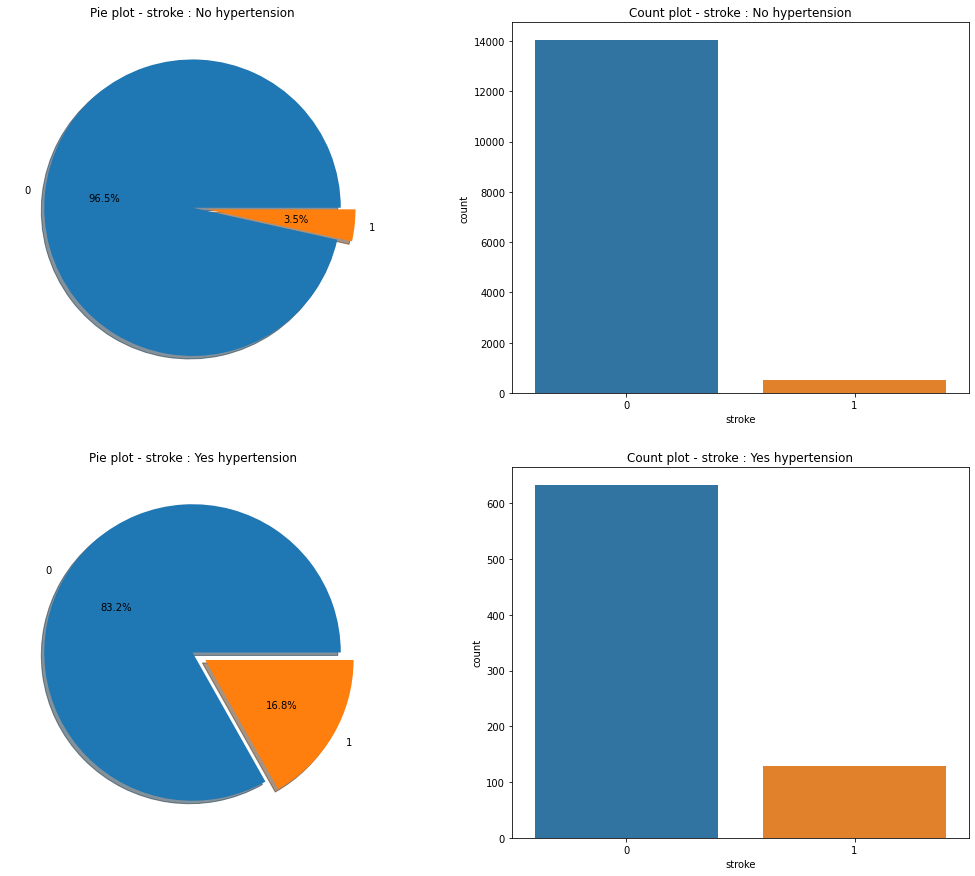

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_hypertension_no['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : No hypertension')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_hypertension_no, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : No hypertension')

df_hypertension_yes['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : Yes hypertension')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_hypertension_yes, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : Yes hypertension')

plt.show()

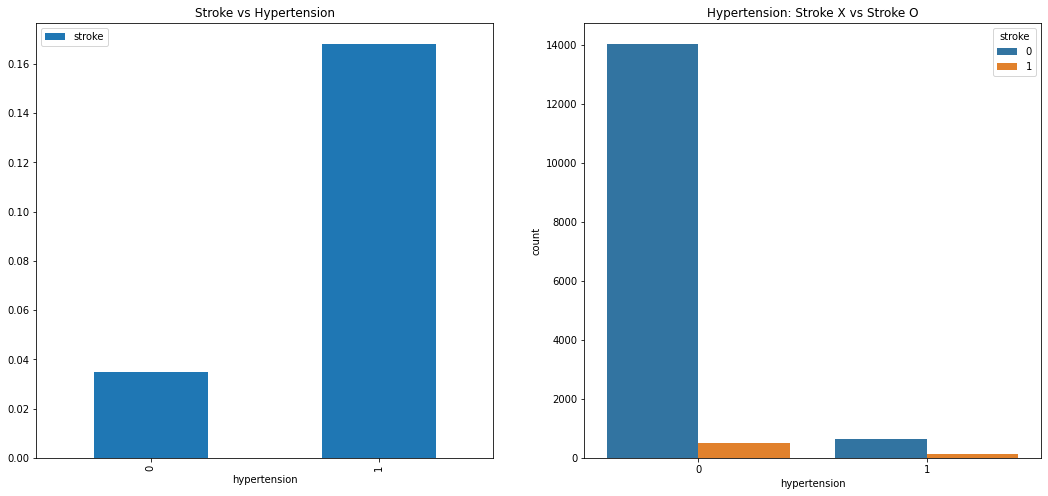

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))


df_stroke[['hypertension', 'stroke']].groupby(['hypertension'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Hypertension')
sns.countplot('hypertension', hue='stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Hypertension: Stroke X vs Stroke O')
plt.show()

In [ ]:
df_stroke[['hypertension', 'stroke']].groupby(['hypertension'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,hypertension,stroke
1,1,0.168200
0,0,0.034656


In [ ]:
pd.crosstab(df_stroke['hypertension'], df_stroke['stroke'], margins=True)

stroke,0,1,All
hypertension,,,
0,14039,504,14543
1,633,128,761
All,14672,632,15304


* 총 15304개 데이터
    * 고혈압 x : 14543 -> 504명 뇌졸중 : 3.5%
    * 고혈압 o : 761 -> 128명 뇌졸중 : 16.8%
* **결론: 고혈압이 없는 사람보단 고혈압이 있는 사람이 뇌졸중일 확률이 높긴 했다. 그렇다고 고혈압이라고 압도적으로 뇌졸중인 사람의 분포가 높지는 않았다. 고혈압인 사람의 데이터가 고혈압이 아닌 사람의 데이터에 비해 적기 때문에 나타난 결과라고 볼 수 있을 것 같다.(고혈압 분포의 수가 비슷했으면 고혈압이 있는 중 뇌졸중인 사람의 확률이 올라갈 것 같다.)**

* 고혈압도 뇌졸중과 비슷하게 나이가 많은 쪽에 분포되어 있을 것 같다.

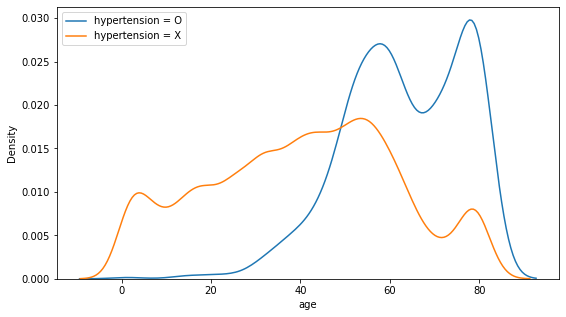

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_stroke[df_stroke['hypertension'] == 1]['age'], ax = ax)
sns.kdeplot(df_stroke[df_stroke['hypertension'] == 0]['age'], ax = ax)
plt.legend(['hypertension = O', 'hypertension = X'])
plt.show()

* 뇌졸중과 마찬가지로 고혈압도 나이가 많을수록 많았다.
* 40세 이전까지는 뇌졸중과 비슷한 분포를 보였지만 뇌졸중은 60세에서는 비슷하다가 80세에 압도적으로 뇌졸중인 사람의 분포가 높았지만 고혈압의 경우 60~80세 비슷한 차이로 고혈압인 경우가 많았다.

## 3.5 heart_disease

* 심장 질환이 있다면 뇌졸중일 확률이 높을 것 같다.

In [ ]:
df_stroke['heart_disease'].value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

In [ ]:
# 심장질환이 없는 사람 데이터
df_hd_no = df_stroke[df_stroke['heart_disease'] == 0]
df_hd_no

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
# 심장 질환이 있는 사람 데이터
df_hd_yes = df_stroke[df_stroke['heart_disease'] == 1]
df_hd_yes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
22,22,Male,71.0,0,1,Yes,Self-employed,Urban,196.61,33.5,formerly smoked,0
81,81,Male,54.0,0,1,Yes,Private,Urban,140.28,31.9,smokes,0
132,132,Male,56.0,0,1,Yes,Private,Urban,82.44,23.9,formerly smoked,0
180,180,Male,78.0,0,1,Yes,Self-employed,Urban,57.20,30.1,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15138,15138,Female,76.0,0,1,Yes,Self-employed,Urban,207.96,34.5,formerly smoked,0
15172,15172,Female,82.0,1,1,Yes,Private,Rural,68.80,26.8,smokes,1
15225,15225,Female,76.0,0,1,Yes,Private,Rural,60.98,29.1,never smoked,1
15236,15236,Male,52.0,0,1,Yes,Private,Urban,86.30,28.8,formerly smoked,0


In [ ]:
# 심장 질환이 없는 사람들의 뇌졸중 유무 분포
df_hd_no['stroke'].value_counts()

0    14381
1      566
Name: stroke, dtype: int64

In [ ]:
# 심장 질환이 있는 사람들의 뇌졸중 유무 분포
df_hd_yes['stroke'].value_counts()

0    291
1     66
Name: stroke, dtype: int64

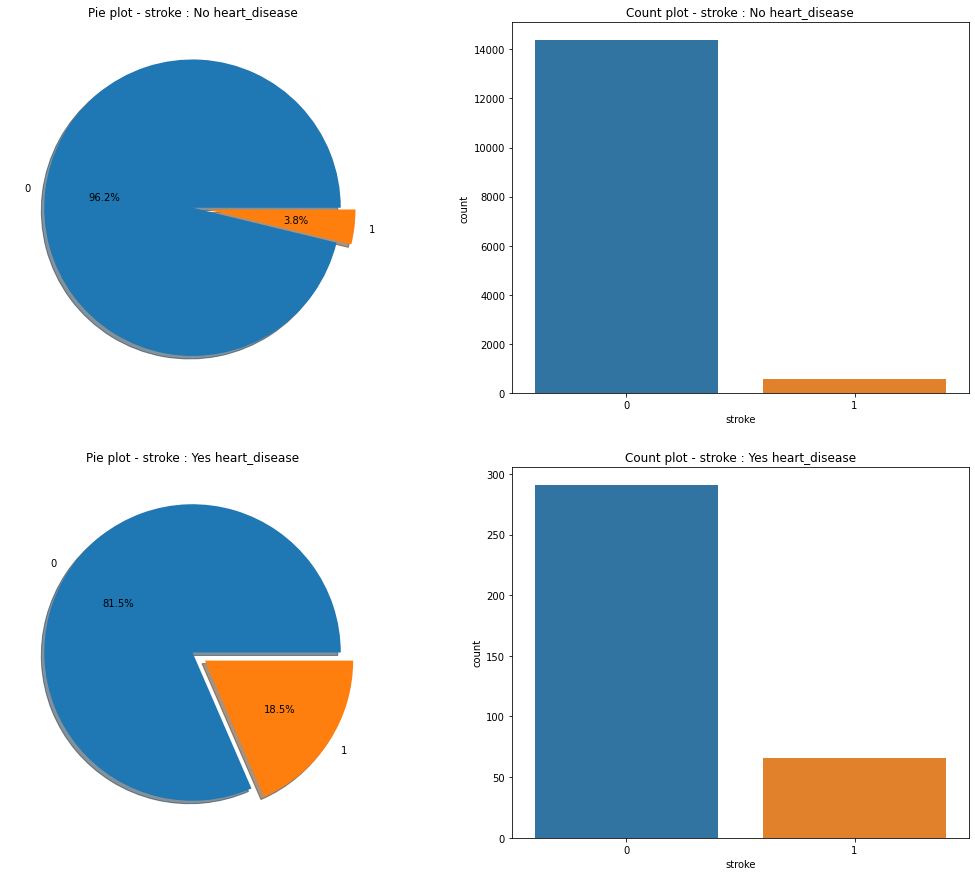

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_hd_no['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : No heart_disease')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_hd_no, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : No heart_disease')

df_hd_yes['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : Yes heart_disease')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_hd_yes, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : Yes heart_disease')

plt.show()

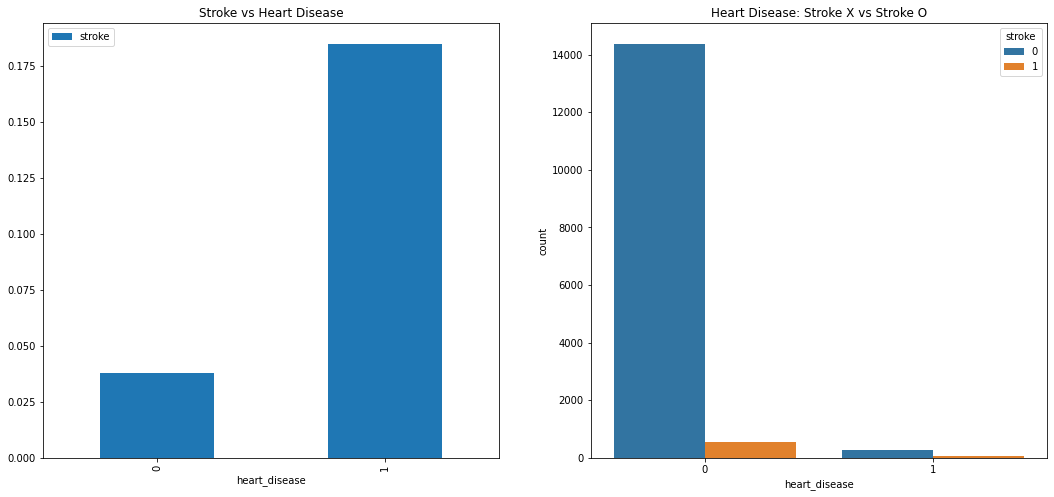

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_stroke[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Heart Disease')
sns.countplot('heart_disease', hue='stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Heart Disease: Stroke X vs Stroke O')
plt.show()

In [ ]:
df_stroke[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,heart_disease,stroke
1,1,0.184874
0,0,0.037867


In [ ]:
pd.crosstab(df_stroke['heart_disease'], df_stroke['stroke'], margins=True)

stroke,0,1,All
heart_disease,,,
0,14381,566,14947
1,291,66,357
All,14672,632,15304


* 총 15304개 데이터
    * 심장 질환 x : 14947 -> 566명 뇌졸중 : 3.8%
    * 심장 질환 o : 357 -> 66명 뇌졸중 : 18.5%
* **결론 : 심장 질환의 유무도 고혈압과 비슷한 것 같다. 심장 질환이 있는 사람이 뇌졸중이 있는 확률이 심장 질환이 없는 사람보다는 높다. 전체적으로 뇌졸중, 고혈압, 심장 질환 모두 있는 사람이 없는 사람에 비해 압도적으로 없기 때문에 유의미한지는 애매하지만 결과적으로 심장 질환이 있을 때 뇌졸중 위험이 있다.**

* 심장질환도 고혈압과 뇌졸중과 비슷하게 나이가 많은 쪽에 분포되어 있을 것 같다.

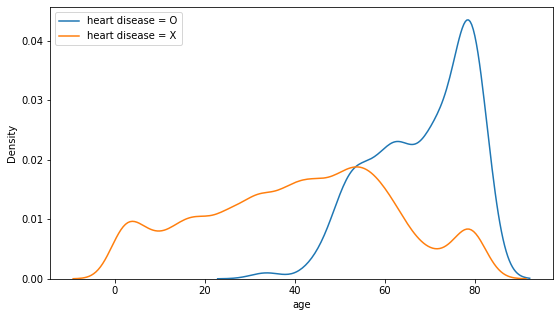

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_stroke[df_stroke['heart_disease'] == 1]['age'], ax = ax)
sns.kdeplot(df_stroke[df_stroke['heart_disease'] == 0]['age'], ax = ax)
plt.legend(['heart disease = O', 'heart disease = X'])
plt.show()

* 심장질환도 뇌졸중과 고혈압과 마찬가지로 나이가 많을수록 많았다.
* 분포 모양 자체는 고혈압 보다는 뇌졸중과 비슷한 형태를 보여주고 있다. -> 뇌졸중과 관련있는게 고혈압 보다 심장질환과 연관이 있을까??
* 또한 20세 이전에는 심장질환이 있는 사람이 아예 없었다.

In [ ]:
# 20세 이하면서 심장질환이 있는 사람 데이터
df_stroke[(df_stroke['age'] <= 20) & (df_stroke['heart_disease'] == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


* 고혈압과 심장질환이 모두 있는 사람 중 뇌졸중일 확률은 얼마나 될까?

In [ ]:
# 고혈압과 심장질환이 모두 있는 사람 데이터
df_all = df_stroke[(df_stroke['hypertension'] == 1) & (df_stroke['heart_disease'] == 1)]
df_all

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
434,434,Male,74.0,1,1,Yes,Private,Rural,88.70,35.0,Unknown,0
1165,1165,Male,71.0,1,1,Yes,Private,Rural,197.09,28.3,formerly smoked,0
1214,1214,Female,71.0,1,1,Yes,Private,Urban,221.24,24.2,Unknown,1
2157,2157,Female,53.0,1,1,Yes,Govt_job,Rural,107.49,38.2,Unknown,0
2474,2474,Female,78.0,1,1,Yes,Self-employed,Urban,101.53,24.1,formerly smoked,0
3179,3179,Male,79.0,1,1,Yes,Self-employed,Rural,72.61,26.5,smokes,1
3313,3313,Male,70.0,1,1,Yes,Private,Rural,221.43,32.5,Unknown,1
3572,3572,Male,62.0,1,1,Yes,Govt_job,Rural,72.79,24.3,smokes,0
3902,3902,Male,74.0,1,1,Yes,Self-employed,Urban,79.94,27.5,never smoked,0
4311,4311,Female,70.0,1,1,Yes,Self-employed,Rural,102.55,23.6,never smoked,0


In [ ]:
# 고혈압과 심장질환이 모두 있는 사람의 뇌졸중 유무 분포
df_all['stroke'].value_counts()

0    42
1    13
Name: stroke, dtype: int64

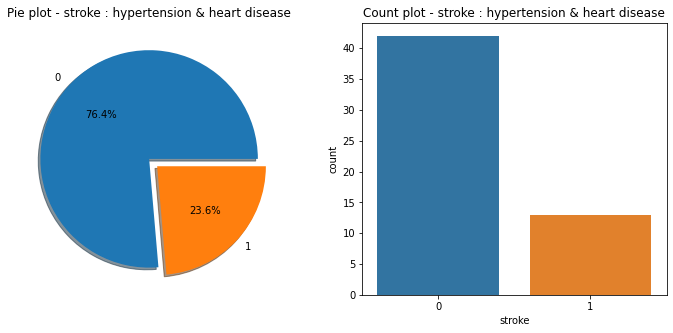

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (12, 5))

df_all['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - stroke : hypertension & heart disease')
ax[0].set_ylabel('')
sns.countplot('stroke', data=df_all, ax=ax[1])
ax[1].set_title('Count plot - stroke : hypertension & heart disease')

plt.show()

* 고혈압 심장질환이 모두 있으면 23.6% 높은 확률로 뇌졸중이 있는 사람이다.
* 55명 중 13명이 뇌졸중이 있는 사람이다.

In [ ]:
13/55

0.23636363636363636

## 3.6 ever_married

* 결혼 유무와 뇌졸중은 큰 관계가 없을 것 같다.

In [ ]:
df_stroke['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [ ]:
# 결혼한 사람 데이터
df_marry = df_stroke[df_stroke['ever_married'] ==  'Yes']
df_marry

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15293,15293,Female,78.0,0,0,Yes,Private,Rural,203.36,28.7,formerly smoked,0
15294,15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [ ]:
# 결혼하지 않은 사람 데이터
df_solo = df_stroke[df_stroke['ever_married'] ==  'No']
df_solo

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,4,Female,24.00,0,0,No,Private,Rural,73.36,28.8,never smoked,0
12,12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
13,13,Male,23.00,0,0,No,Private,Urban,112.09,37.3,smokes,0
20,20,Female,31.00,0,0,No,Private,Rural,106.68,28.4,smokes,0
21,21,Female,1.72,0,0,No,children,Rural,94.12,20.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15296,15296,Female,5.00,0,0,No,children,Urban,73.92,13.5,Unknown,0
15297,15297,Female,32.00,0,0,No,Private,Urban,75.06,32.4,smokes,0
15298,15298,Female,17.00,0,0,No,Private,Rural,77.65,24.8,smokes,0
15299,15299,Female,22.00,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0


In [ ]:
# 결혼한 사람들의 뇌졸중 유무 분포
df_marry['stroke'].value_counts()

0    9794
1     591
Name: stroke, dtype: int64

In [ ]:
# 결혼 안한 사람들의 뇌졸중 유무 분포
df_solo['stroke'].value_counts()

0    4878
1      41
Name: stroke, dtype: int64

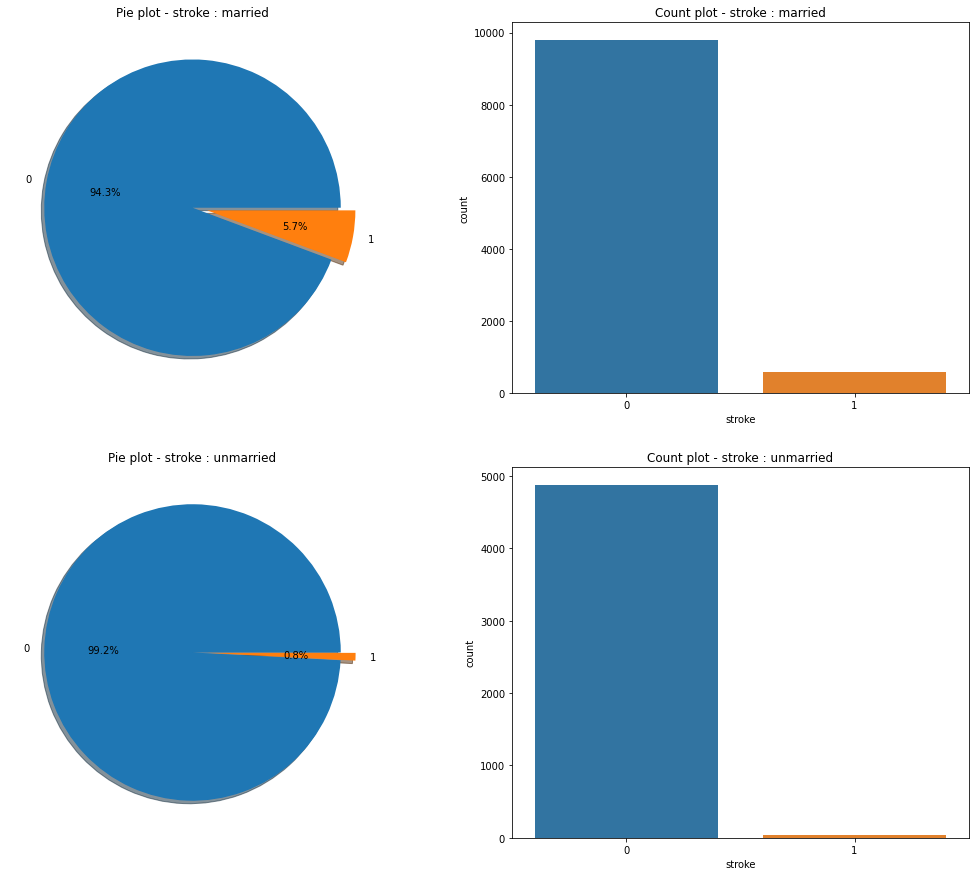

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_marry['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : married')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_marry, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : married')

df_solo['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : unmarried')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_solo, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : unmarried')

plt.show()

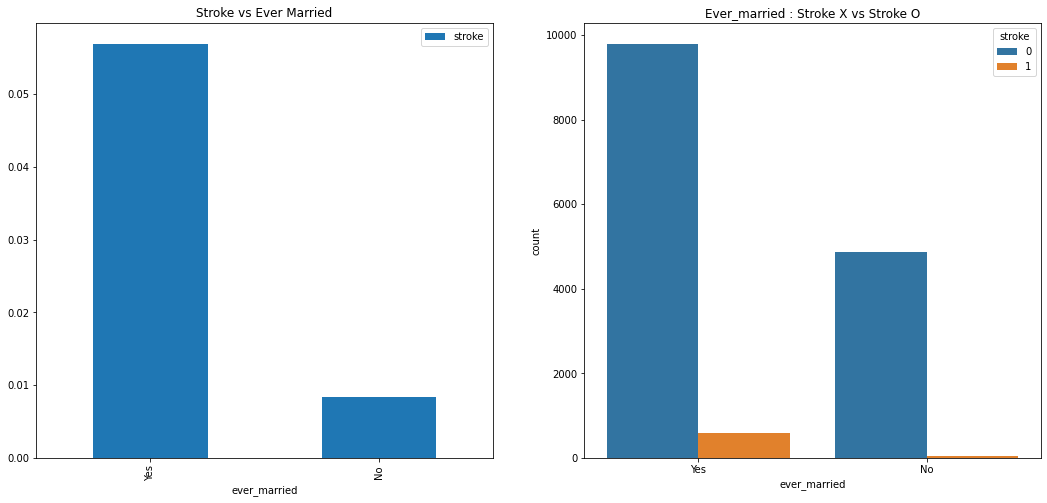

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_stroke[['ever_married', 'stroke']].groupby(['ever_married'], as_index=True).mean().sort_values(by='ever_married',ascending = False).plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Ever Married')
sns.countplot('ever_married', hue='stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Ever_married : Stroke X vs Stroke O')
plt.show()

In [ ]:
df_stroke[['ever_married', 'stroke']].groupby(['ever_married'], as_index=True).mean().sort_values(by='ever_married',ascending = False)

,stroke
ever_married,
Yes,0.056909
No,0.008335


In [ ]:

df_stroke[['ever_married', 'stroke']].groupby(['ever_married'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,ever_married,stroke
1,Yes,0.056909
0,No,0.008335


In [ ]:
pd.crosstab(df_stroke['ever_married'], df_stroke['stroke'], margins=True)     

stroke,0,1,All
ever_married,,,
No,4878,41,4919
Yes,9794,591,10385
All,14672,632,15304


* 총 15304개 데이터
    * 결혼 o : 10385 -> 591명 뇌졸중 : 5.7%
    * 결혼 x : 4919 -> 41명 뇌졸중 : 0.8%
* **결론 : 결혼 유무는 뇌졸중과 큰 연관이 없을거라고 생각했지만 결혼한 사람보다는 결혼 하지 않은 사람들이 뇌졸중일 확률이 낮았다. 결혼한 사람은 전체 분포와 비슷한 확률로 뇌졸중이 있었고 결혼 하지 않은 사람은 전체 분포보다는 낮은 0.8%만 뇌졸중이었다**.

* 위와 같은 결과는 **결혼 유무가 나이와 연관**있기 때문에 발생한 것이라고 생각한다. -> 지금까지 나이가 많은 사람이 어린 사람보다 뇌졸중 확률이 높았다. 결혼하지 않은 사람들은 대체로 어리기 때문에 뇌졸중 확률이 낮게 나왔다고 생각된다.

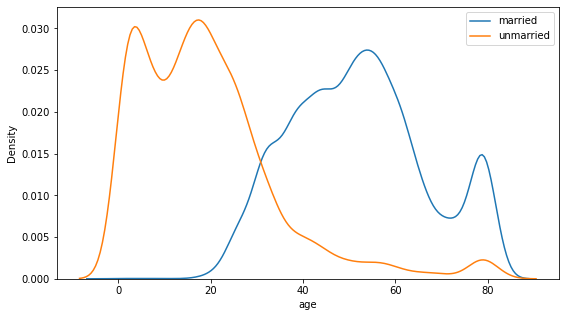

In [ ]:
# 결혼 유무에 따른 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_stroke[df_stroke['ever_married'] == 'Yes']['age'], ax = ax)
sns.kdeplot(df_stroke[df_stroke['ever_married'] == 'No']['age'], ax = ax)
plt.legend(['married', 'unmarried'])
plt.show()

* 결혼 유무가 뇌졸중에 직접적인 영향을 줄 수 있는 변수라고 생각될 수는 없지만 나이와 연관이 있기 때문에 조금은 영향이 있다고 보여진다.

## 3.7 work_type

* 작업 유형은 Private?, 어린이, 자영업자, 공무원, 일 안함으로 나뉘어진다. 
* 어린이로 분류된 사람은 뇌졸중이 거의 없을 것이고 그 외는 뇌졸중에 영향을 안 줄 것 같다.

In [ ]:
df_stroke['work_type'].value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [ ]:
# private 유형인 사람 데이터
df_private = df_stroke[df_stroke['work_type'] == 'Private']
df_private

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15297,15297,Female,32.0,0,0,No,Private,Urban,75.06,32.4,smokes,0
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
# 어린이 유형인 사람 데이터
df_children = df_stroke[df_stroke['work_type'] == 'children']
df_children

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12,12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
21,21,Female,1.72,0,0,No,children,Rural,94.12,20.8,Unknown,0
28,28,Female,12.00,0,0,No,children,Rural,84.11,23.5,Unknown,0
30,30,Female,4.00,0,0,No,children,Rural,60.73,18.0,Unknown,0
38,38,Male,8.00,0,0,No,children,Urban,85.79,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15280,15280,Male,14.00,0,0,No,children,Urban,112.26,23.0,never smoked,0
15287,15287,Female,5.00,0,0,No,children,Rural,94.33,18.2,Unknown,0
15292,15292,Female,0.32,0,0,No,children,Urban,89.04,17.8,Unknown,0
15295,15295,Male,12.00,0,0,No,children,Urban,69.78,14.3,never smoked,0


In [ ]:
# 자영업자 유형인 사람 데이터
df_self = df_stroke[df_stroke['work_type'] == 'Self-employed']
df_self

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
10,10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
22,22,Male,71.0,0,1,Yes,Self-employed,Urban,196.61,33.5,formerly smoked,0
31,31,Female,48.0,0,0,Yes,Self-employed,Urban,65.61,26.4,never smoked,0
43,43,Female,52.0,1,0,Yes,Self-employed,Urban,129.19,35.6,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15266,15266,Female,59.0,0,0,Yes,Self-employed,Urban,91.95,25.1,formerly smoked,0
15268,15268,Female,79.0,0,0,Yes,Self-employed,Urban,79.53,32.9,smokes,0
15274,15274,Female,63.0,0,0,Yes,Self-employed,Rural,93.88,29.2,never smoked,0
15277,15277,Female,33.0,0,0,Yes,Self-employed,Urban,96.26,33.2,formerly smoked,0


In [ ]:
# 공무원 유형인 사람 데이터
df_gov = df_stroke[df_stroke['work_type'] == 'Govt_job']
df_gov

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0
17,17,Female,40.0,0,0,Yes,Govt_job,Rural,76.42,28.4,never smoked,0
19,19,Female,31.0,0,0,Yes,Govt_job,Rural,100.09,28.2,never smoked,0
27,27,Female,57.0,0,0,No,Govt_job,Rural,92.82,28.7,never smoked,0
29,29,Male,61.0,0,0,Yes,Govt_job,Rural,75.03,27.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15282,15282,Female,37.0,0,0,No,Govt_job,Urban,84.18,34.4,Unknown,0
15283,15283,Male,59.0,0,0,Yes,Govt_job,Urban,86.23,26.3,formerly smoked,0
15286,15286,Female,38.0,0,0,Yes,Govt_job,Rural,90.90,30.3,never smoked,0
15289,15289,Male,55.0,0,0,Yes,Govt_job,Urban,55.28,31.5,never smoked,0


In [ ]:
# 직업이 없는 사람 데이터
df_no_job = df_stroke[df_stroke['work_type'] == 'Never_worked']
df_no_job

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
545,545,Male,17.00,0,0,No,Never_worked,Rural,86.35,23.9,never smoked,0
680,680,Female,14.00,0,0,No,Never_worked,Urban,61.29,20.1,Unknown,0
684,684,Female,17.00,0,0,No,Never_worked,Rural,57.59,31.7,Unknown,0
1330,1330,Female,17.00,0,0,No,Never_worked,Urban,81.73,40.9,never smoked,0
1379,1379,Male,13.00,0,0,No,Never_worked,Rural,111.48,19.5,never smoked,0
2242,2242,Female,13.00,0,0,No,Never_worked,Urban,84.85,22.4,never smoked,0
2661,2661,Female,14.00,0,0,No,Never_worked,Rural,73.06,20.9,never smoked,0
2885,2885,Male,15.00,0,0,No,Never_worked,Rural,112.09,22.2,formerly smoked,0
2899,2899,Female,18.00,0,0,No,Never_worked,Urban,82.36,21.1,never smoked,0
2940,2940,Female,32.00,0,0,No,Never_worked,Urban,73.48,42.3,never smoked,0


In [ ]:
# private 유형 사람들의 뇌졸중 유무 분포
df_private['stroke'].value_counts()

0    9348
1     404
Name: stroke, dtype: int64

In [ ]:
# 어린이 유형 사람들의 뇌졸중 유무 분포
df_children['stroke'].value_counts()

0    2037
1       1
Name: stroke, dtype: int64

In [ ]:
# 자영업자 유형 사람들의 뇌졸중 유무 분포
df_self['stroke'].value_counts()

0    1781
1     158
Name: stroke, dtype: int64

In [ ]:
# 공무원 유형 사람들의 뇌졸중 유무 분포
df_gov['stroke'].value_counts()

0    1464
1      69
Name: stroke, dtype: int64

In [ ]:
# 직업이 없는 사람들의 뇌졸중 유무 분포
df_no_job['stroke'].value_counts()

0    42
Name: stroke, dtype: int64

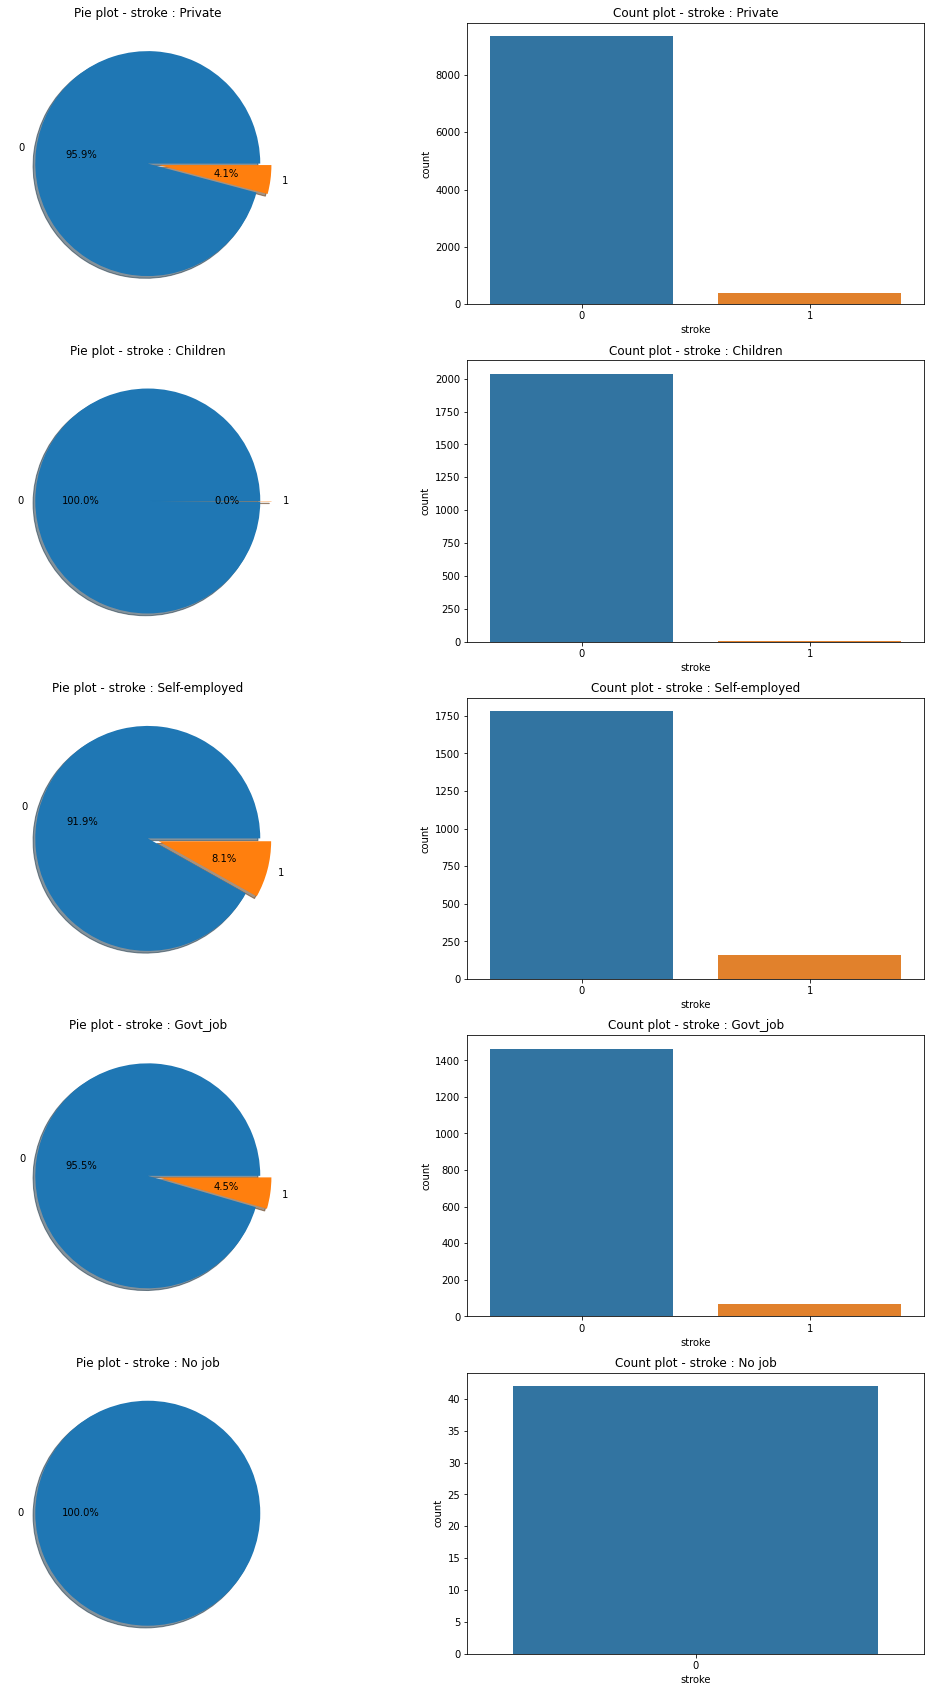

In [ ]:
f, ax = plt.subplots(5, 2, figsize = (18, 30))


df_private['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0,0].set_title('Pie plot - stroke : Private')
ax[0,0].set_ylabel('')
sns.countplot('stroke', data = df_private, ax = ax[0,1])
ax[0,1].set_title('Count plot - stroke : Private')

df_children['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[1,0], shadow = True)
ax[1,0].set_title('Pie plot - stroke : Children')
ax[1,0].set_ylabel('')
sns.countplot('stroke', data = df_children, ax = ax[1,1])
ax[1,1].set_title('Count plot - stroke : Children')

df_self['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[2,0], shadow = True)
ax[2,0].set_title('Pie plot - stroke : Self-employed')
ax[2,0].set_ylabel('')
sns.countplot('stroke', data = df_self, ax = ax[2,1])
ax[2,1].set_title('Count plot - stroke : Self-employed')

df_gov['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[3,0], shadow = True)
ax[3,0].set_title('Pie plot - stroke : Govt_job')
ax[3,0].set_ylabel('')
sns.countplot('stroke', data = df_gov, ax = ax[3,1])
ax[3,1].set_title('Count plot - stroke : Govt_job')

df_no_job['stroke'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[4,0], shadow = True)
ax[4,0].set_title('Pie plot - stroke : No job')
ax[4,0].set_ylabel('')
sns.countplot('stroke', data = df_no_job, ax = ax[4,1])
ax[4,1].set_title('Count plot - stroke : No job')

plt.show()

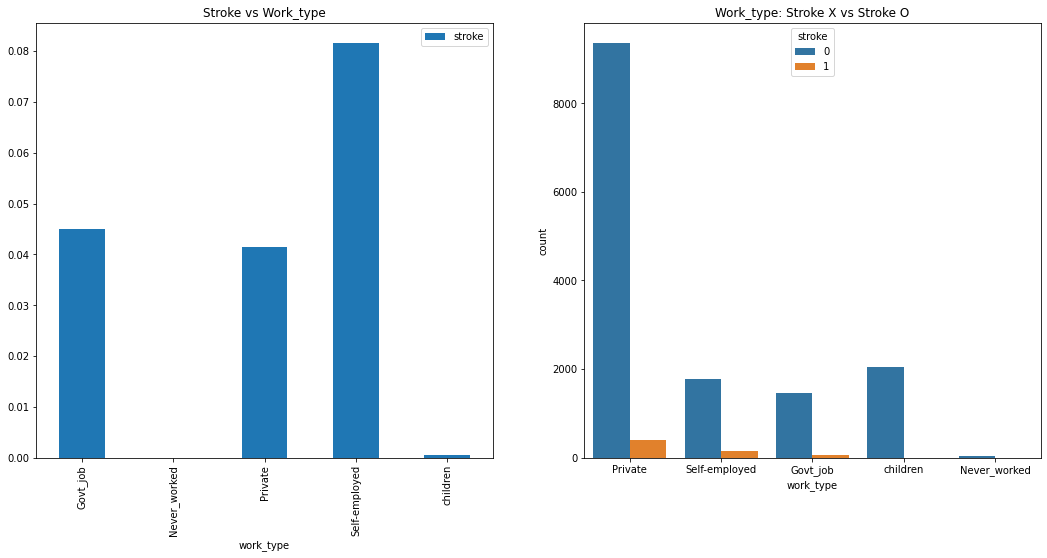

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_stroke[['work_type', 'stroke']].groupby(['work_type'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Work_type')
# ax[0].xticks()
sns.countplot('work_type', hue='stroke', data=df_stroke, ax=ax[1])
ax[1].set_title('Work_type: Stroke X vs Stroke O')
plt.show()

# 시각화 할 때 x 축 값들을 내가 원하는 순서로 정렬하는 방법은??

In [ ]:
df_stroke[['work_type', 'stroke']].groupby(['work_type'], as_index = False).mean().sort_values(by='stroke', ascending = False)

,work_type,stroke
3,Self-employed,0.081485
0,Govt_job,0.045010
2,Private,0.041427
4,children,0.000491
1,Never_worked,0.000000


In [ ]:
pd.crosstab(df_stroke['work_type'],df_stroke['stroke'], margins = True)

stroke,0,1,All
work_type,,,
Govt_job,1464,69,1533
Never_worked,42,0,42
Private,9348,404,9752
Self-employed,1781,158,1939
children,2037,1,2038
All,14672,632,15304


* 총 15304개 데이터
    * Private : 9752 -> 404명 뇌졸중 : 4.1%
    * children : 2038 -> 1명 뇌졸중 : 0%
    * Self-employed : 1939 -> 158명 뇌졸중 : 8.1%
    * Govt_job : 1533 -> 69명 뇌졸중 : 4.5%
    * Never_worked : 42 -> 0명 뇌졸중 : 0%
* **결론 : 어린이 유형은 나이가 어리다 보니 뇌졸중일 확률이 거의 없다. Private과 공무원은 큰 차이가 없었다. 자영업자들이 좀 높은 확률을 보였고 데이터가 적긴 하지만 직업이 없는 경우 뇌졸중이 한명도 없었다.**

* 어린이의 나이 분포 및 뇌졸중에 걸린 사람 데이터 확인

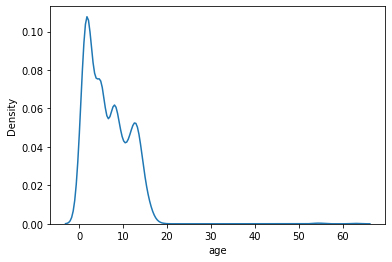

In [ ]:
# 어린이 나이 분포
sns.kdeplot(df_children['age'])

In [ ]:
df_children['age'].describe()

count    2038.000000
mean        6.474171
std         4.867938
min         0.080000
25%         2.000000
50%         5.000000
75%        10.000000
max        63.000000
Name: age, dtype: float64

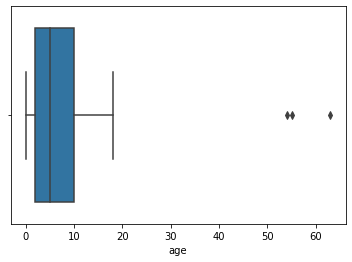

In [ ]:
sns.boxplot(df_children['age'])

In [ ]:
# 어린이 중 뇌졸중인 사람 데이터
df_children[df_children['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3226,3226,Male,10.0,0,0,No,children,Urban,93.28,18.4,Unknown,1


In [ ]:
# 어린이 데이터 중 나이 이상치 데이터
df_children[df_children['age'] >= 50]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4935,4935,Female,55.0,0,0,No,children,Rural,81.59,17.7,formerly smoked,0
10481,10481,Female,54.0,0,0,No,children,Rural,65.78,32.2,formerly smoked,0
14103,14103,Male,63.0,0,1,Yes,children,Rural,78.73,16.4,Unknown,0


* 어린이 유형이라면 뇌졸중이 안나올줄 알았지만 나왔다. 
* 혹시 잘못된 데이터가 들어가 있는 것은 아닌가 확인한 결과 나이가 이상치인 값들이 몇 개 있었다.
* 하지만 뇌졸중이 있는 사람은 이상치 값을 가진 사람이 아닌 10세 남성이었다.
* 나이 이상치 데이터들은 어떻게 처리해줘야할까?
    * 제거한다.
    * work_type을 private으로 변경해준다.

* 직업이 없는 사람 데이터의 특이점

In [ ]:
df_no_job['age'].describe()

count    42.000000
mean     15.859048
std       4.080806
min       1.080000
25%      14.000000
50%      16.000000
75%      17.000000
max      32.000000
Name: age, dtype: float64

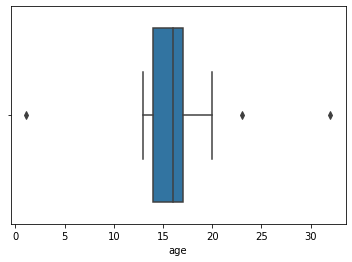

In [ ]:
sns.boxplot(df_no_job['age'])

* work_type이 Never_worked인 사람들도 대부분 20세 이하 이기 때문에 children으로 변경해줘도 될 것 같다.
* 그 외는 결측처리 or private으로 변경해줘야 할 것 같다.

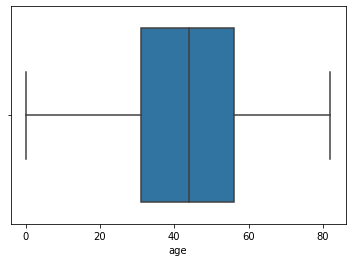

In [ ]:
sns.boxplot(df_private['age'])

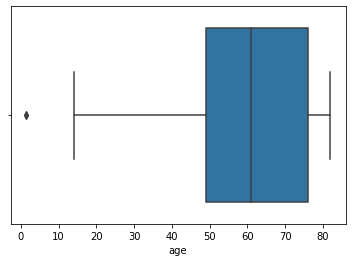

In [ ]:
sns.boxplot(df_self['age'])

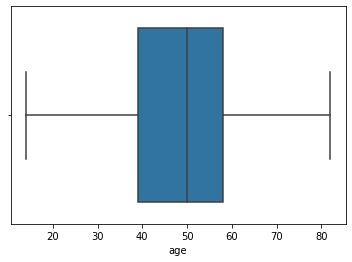

In [ ]:
sns.boxplot(df_gov['age'])

In [ ]:
df_gov['age'].describe()

count    1533.000000
mean       49.104371
std        13.475810
min        14.000000
25%        39.000000
50%        50.000000
75%        58.000000
max        82.000000
Name: age, dtype: float64

* 그 외 다른 작업 유형에서도 나이 이상치가 발견되었다. 
* work_type 변수 자체에 문제가 좀 있는거 같다. 뇌졸중에 직접적인 영향을 주는 변수도 아니기때문에 제외할 것을 고려해야할 것 같다.

## 3.8 Residence_type

* 주거 형태는 뇌졸중에 직접적인 영향을 없을 것 같지만 도심에서 사는 것 보단 시골에서 사는 사람들이 뇌졸중일 확률이 더 적을 것 같다.

In [ ]:
df_stroke['Residence_type'].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [ ]:
# 시골에 거주하는 사람 데이터
df_r = df_stroke[df_stroke['Residence_type'] == 'Rural']
df_r

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15293,15293,Female,78.0,0,0,Yes,Private,Rural,203.36,28.7,formerly smoked,0
15294,15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
# 도시에거주하는 사람 데이터
df_u = df_stroke[df_stroke['Residence_type'] == 'Urban']
df_u

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0
10,10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15296,15296,Female,5.0,0,0,No,children,Urban,73.92,13.5,Unknown,0
15297,15297,Female,32.0,0,0,No,Private,Urban,75.06,32.4,smokes,0
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0


In [ ]:
# 시골에 거주하는 사람들의 뇌졸중 유무 분포
df_r['stroke'].value_counts()

0    7347
1     317
Name: stroke, dtype: int64

In [ ]:
# 도시에 거주하는사람들의 뇌졸중 유무 분포
df_u['stroke'].value_counts()

0    7325
1     315
Name: stroke, dtype: int64

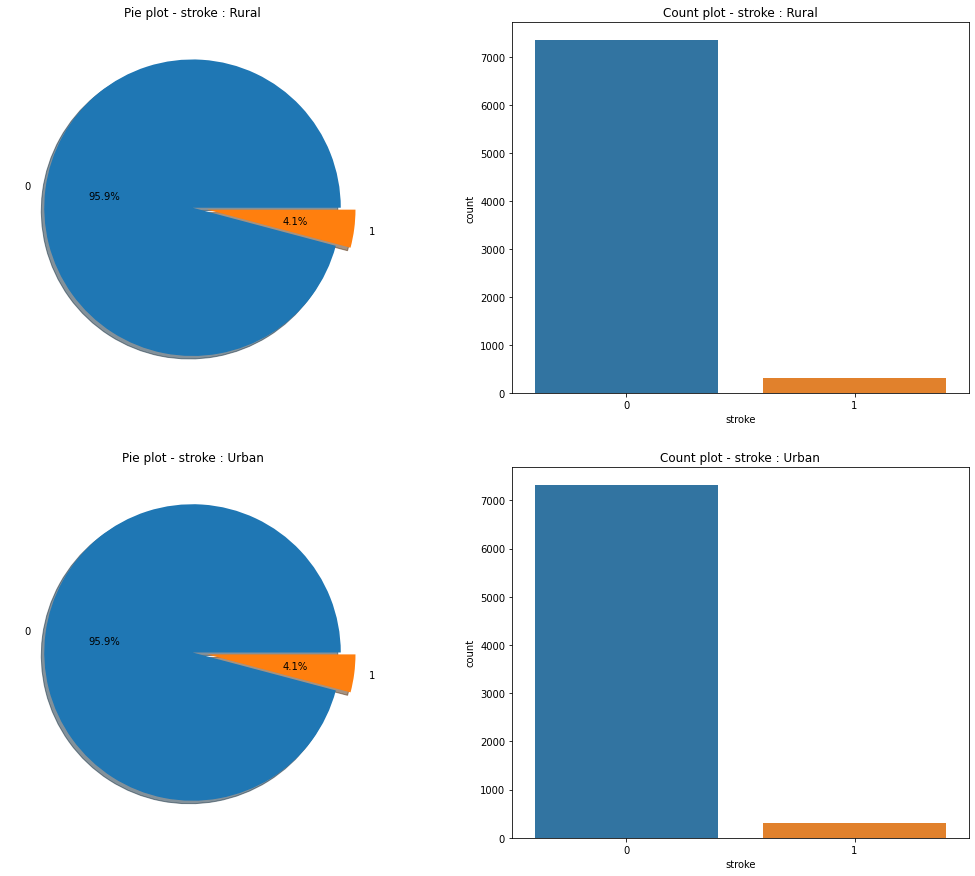

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_r['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : Rural')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_r, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : Rural')

df_u['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : Urban')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_u, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : Urban')

plt.show()

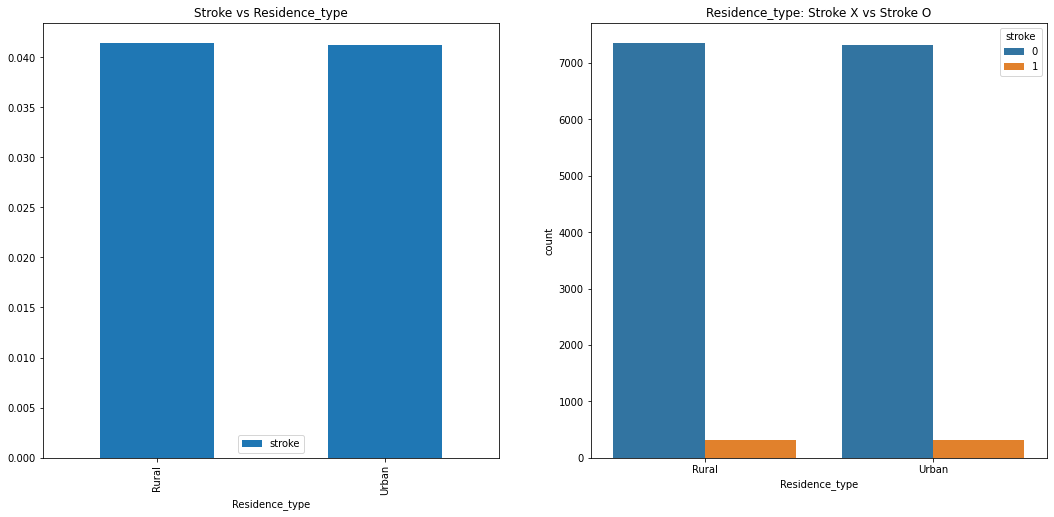

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_stroke[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Residence_type')
sns.countplot('Residence_type', hue='stroke', data=df_stroke, ax=ax[1], order = df_stroke['Residence_type'].value_counts().index)
ax[1].set_title('Residence_type: Stroke X vs Stroke O')
plt.show()

In [ ]:
df_stroke[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index=False).mean().sort_values(by = 'stroke', ascending = False)

,Residence_type,stroke
0,Rural,0.041362
1,Urban,0.041230


In [ ]:
pd.crosstab(df_stroke['Residence_type'], df_stroke['stroke'], margins = True)

stroke,0,1,All
Residence_type,,,
Rural,7347,317,7664
Urban,7325,315,7640
All,14672,632,15304


* 총 15304개 데이터
    * Rural(시골 거주) : 7664 -> 317명 뇌졸중 : 4.1%
    * Urban(도시 거주) : 7640 -> 315명 뇌졸중 : 4.1%
* **결론 : 지금까지 분석한 변수들 중 가장 유형별로 고르게 분포되어 있던 변수라 유의미한 차이가 있기를 바랬지만 거주 유형는 뇌졸중에 큰 영향을 주는 것 같지는 않았다.**

## 3.9 avg_glucose_level

* 혈당이 높으면 혈압이 오르기 쉬워 고혈압이 올 가능성이 높다. 그러므로 고혈압인 사람이 뇌졸중이 있을 확률이 높기 때문에 평균 혈당 수치도 높으면 뇌졸중이 있을 확률이 높을 것 같다.
* 출처 : https://health.chosun.com/mildang365/html/tip/20220621142110.html

In [ ]:
df_stroke['avg_glucose_level'].describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

In [ ]:
print('제일 평균 포도당 수치가 높은 사람 : {:.1f}'.format(df_stroke['avg_glucose_level'].max()))
print('제일 평균 포도당 수치가 낮은 사람 : {:.1f}'.format(df_stroke['avg_glucose_level'].min()))
print('평균 포도당 수치 평균 값: {:.1f}'.format(df_stroke['avg_glucose_level'].mean()))

제일 평균 포도당 수치가 높은 사람 : 267.6
제일 평균 포도당 수치가 낮은 사람 : 55.2
평균 포도당 수치 평균 값: 89.0


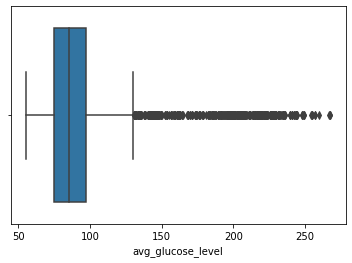

In [ ]:
sns.boxplot(df_stroke['avg_glucose_level'])

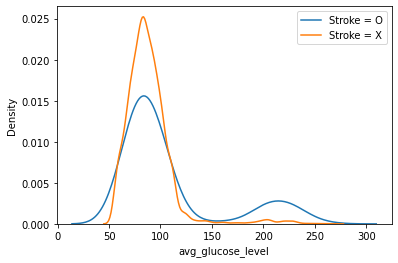

In [ ]:
# 뇌졸중 유무 별 평균 포도당 수치 분포

sns.kdeplot(df_stroke[df_stroke['stroke'] == 1]['avg_glucose_level'])
sns.kdeplot(df_stroke[df_stroke['stroke'] == 0]['avg_glucose_level'])
plt.legend(['Stroke = O', 'Stroke = X'])
plt.show()

* 평균 포도당 수치가 매우 낮거나(약 70 이하) 매우 높은 경우(약 110 이상)일 때 뇌졸중일 확률이 더 높다.
* 평균 값 근처에서는 뇌졸중이 없는 사람이 더 많다.  

* 혈당을 검사할 때는 공복인 경우에 검사를 하는데 정상치는 70~ 110이다. - 출처 : https://www.chamc.co.kr/health/e_clinic/content.asp?cc_id=10606&co_id=1512&ct_id=106
* 정상 수치와 비정상 수치인 사람을 나누어 뇌졸중 유무정도를 비교해보자.

In [ ]:
df_avg = df_stroke[(df_stroke['avg_glucose_level'] >= 70) & (df_stroke['avg_glucose_level'] <= 110)]
df_avg

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
df_other = df_stroke[(df_stroke['avg_glucose_level'] < 70) | (df_stroke['avg_glucose_level'] > 110)]
df_other

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0
10,10,Male,51.0,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
11,11,Female,45.0,0,0,Yes,Private,Urban,69.94,23.5,never smoked,0
13,13,Male,23.0,0,0,No,Private,Urban,112.09,37.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15289,15289,Male,55.0,0,0,Yes,Govt_job,Urban,55.28,31.5,never smoked,0
15291,15291,Female,32.0,0,0,Yes,Private,Rural,58.46,23.4,never smoked,0
15293,15293,Female,78.0,0,0,Yes,Private,Rural,203.36,28.7,formerly smoked,0
15294,15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1


In [ ]:
# 정상 수치인 사람들의 뇌졸중 유무 분포
df_avg['stroke'].value_counts()

0    11034
1      413
Name: stroke, dtype: int64

In [ ]:
# 비정상 수치인 사람들의 뇌졸중 유무 분포
df_other['stroke'].value_counts()

0    3638
1     219
Name: stroke, dtype: int64

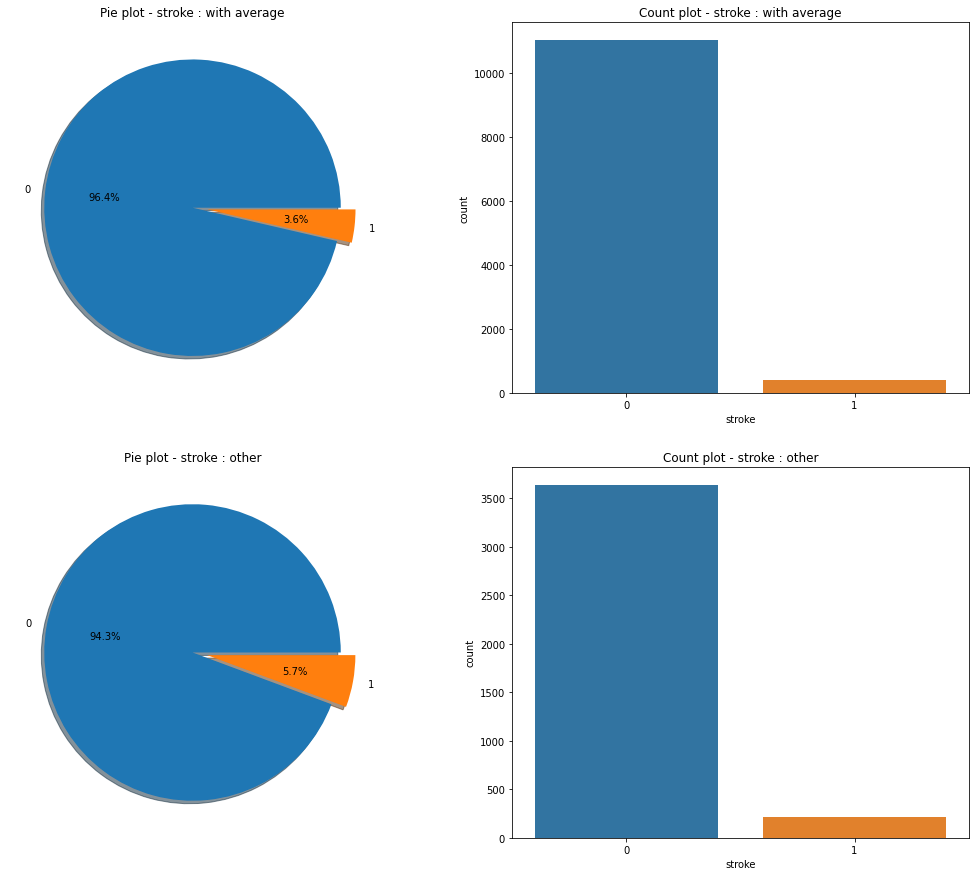

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_avg['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : with average')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_avg, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : with average')

df_other['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : other')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_other, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : other')

plt.show()

* 총 15304개 데이터
    * 평균 : 11447 -> 413명 뇌졸중 : 3.6%
    * 그 외 : 3857 -> 219명 뇌졸중 : 5.7%
* **결론 : 평균 혈당 수치가 아닌 사람들이 뇌졸중일 확률이 조금은 높긴하지만 큰 차이를 보이지는 않았다.**

## 3.10 bmi

* BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만이다. - 출처 : https://www.oc.go.kr/health/contents.do?key=1487&
* 정상이 아닌 사람은 정상인 사람에 비해 덜 건강하기 때문에 뇌졸중이 있을 확률이 높을 것 같지만 뇌졸중과 bmi에는 큰 상관관계가 없을 것 같다.

In [ ]:
df_stroke['bmi'].describe()

count    15304.000000
mean        28.112721
std          6.722315
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64

In [ ]:
print('bmi가 가장 높은 사람 : {:.1f}'.format(df_stroke['bmi'].max()))
print('bmi가 가장 낮은 사람 : {:.1f}'.format(df_stroke['bmi'].min()))
print('bmi 평균: {:.1f}'.format(df_stroke['bmi'].mean()))

bmi가 가장 높은 사람 : 80.1
bmi가 가장 낮은 사람 : 10.3
bmi 평균: 28.1


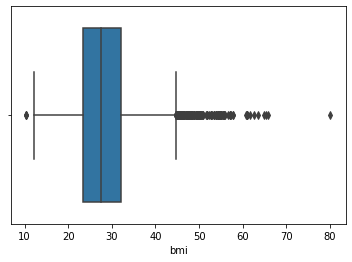

In [ ]:
sns.boxplot(df_stroke['bmi'])

In [ ]:
# bmi가 80인 데이터 확인
df_stroke[df_stroke['bmi'] == 80.1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4295,4295,Female,52.0,0,0,Yes,Self-employed,Urban,84.54,80.1,Unknown,0


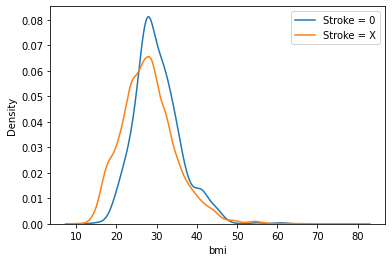

In [ ]:
# 뇌졸중 유무 별 bmi 수치 분포

sns.kdeplot(df_stroke[df_stroke['stroke'] == 1]['bmi'])
sns.kdeplot(df_stroke[df_stroke['stroke'] == 0]['bmi'])
plt.legend(['Stroke = 0', 'Stroke = X'])
plt.show()

* bmi 수치가 과체중 이상인 사람들에게서 뇌졸중이 발생할 확률이 더 높게 나타났다. 
* 저체중인 사람은 오히려 뇌졸중이 발생하지 않을 확률이 더 높았다.

In [ ]:
# 과체중 이상인 사람들의 데이터
df_over = df_stroke[df_stroke['bmi'] >= 23]
df_over

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15297,15297,Female,32.0,0,0,No,Private,Urban,75.06,32.4,smokes,0
15298,15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [ ]:
# 그 외 사람들의 데이터
df_other2 = df_stroke[df_stroke['bmi'] < 23]
df_other2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5,5,Female,34.00,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
9,9,Female,62.00,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0
10,10,Male,51.00,0,0,Yes,Self-employed,Urban,114.89,20.1,never smoked,0
12,12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
21,21,Female,1.72,0,0,No,children,Rural,94.12,20.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15292,15292,Female,0.32,0,0,No,children,Urban,89.04,17.8,Unknown,0
15295,15295,Male,12.00,0,0,No,children,Urban,69.78,14.3,never smoked,0
15296,15296,Female,5.00,0,0,No,children,Urban,73.92,13.5,Unknown,0
15299,15299,Female,22.00,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0


In [ ]:
# 과체중 이상인 사람들의 뇌졸중 유무 분포
df_over['stroke'].value_counts()

0    11414
1      582
Name: stroke, dtype: int64

In [ ]:
# 그 외인 사람들의 뇌졸중 유무 분포
df_other2['stroke'].value_counts()

0    3258
1      50
Name: stroke, dtype: int64

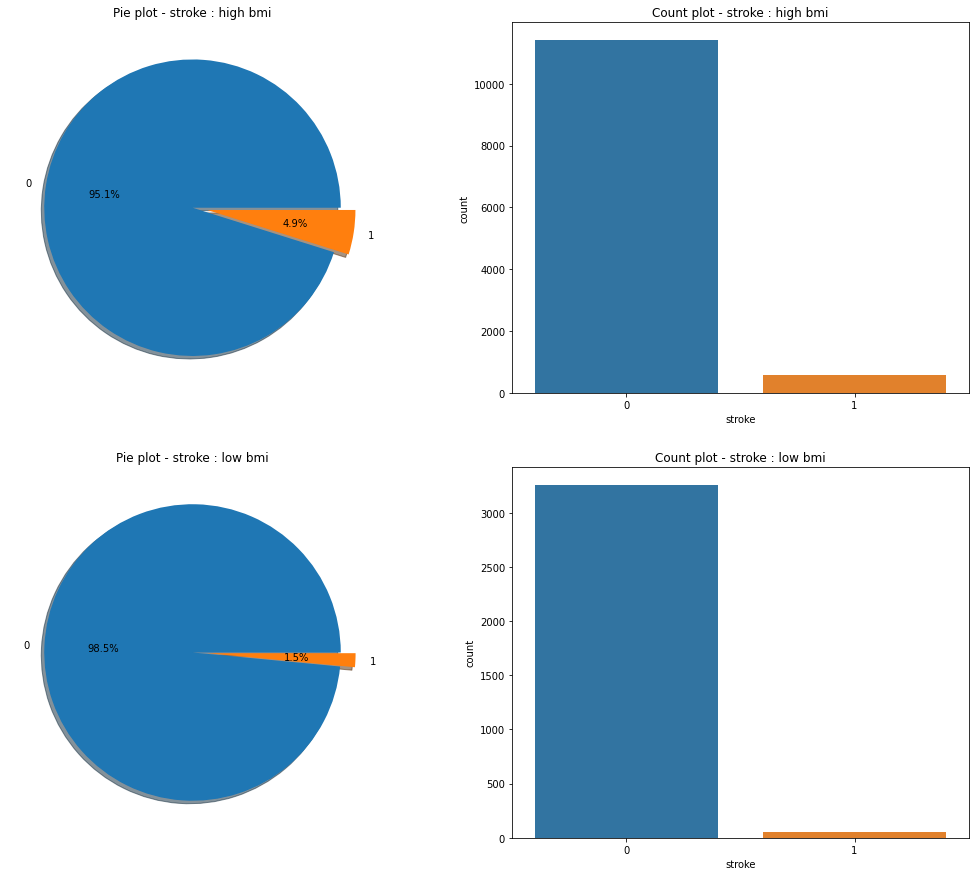

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 15))

df_over['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0, 0].set_title('Pie plot - stroke : high bmi')
ax[0, 0].set_ylabel('')
sns.countplot('stroke', data=df_over, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - stroke : high bmi')

df_other2['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - stroke : low bmi')
ax[1, 0].set_ylabel('')
sns.countplot('stroke', data=df_other2, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - stroke : low bmi')

plt.show()

* 총 15304개 데이터
    * 과제충 이상 : 11996 -> 582명 뇌졸중 : 4.9%
    * 그 외 : 3308 -> 50명 뇌졸중 : 1.5%
* **결론 : 우선 생각보다 bmi가 과체중 이상인 사람 데이터가 압도적으로 많아서 좋은 비교를 할 수 없었다. 다만, 과체중 이상인 사람들이 대부분의 사람이기 때문에 뇌졸중일 확률이 전체 데이터와 비슷했고 정상 및 저체중인 사람들이 오히려 뇌졸중일 확률이 적었다.**

## 3.11 smoking_status

* 흡연을 하는 사람이 흡연을 하지 않은 사람보다 뇌졸중일 확률이 더 높을 것 같다.

In [ ]:
df_stroke['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [ ]:
# smoking_status가 결측값인 사람의 데이터
df_nan = df_stroke[df_stroke['smoking_status'] == 'Unknown']
df_nan

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,2,Female,42.00,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
5,5,Female,34.00,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
7,7,Male,78.00,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
12,12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
21,21,Female,1.72,0,0,No,children,Rural,94.12,20.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15287,15287,Female,5.00,0,0,No,children,Rural,94.33,18.2,Unknown,0
15292,15292,Female,0.32,0,0,No,children,Urban,89.04,17.8,Unknown,0
15294,15294,Male,79.00,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15296,15296,Female,5.00,0,0,No,children,Urban,73.92,13.5,Unknown,0


In [ ]:
# smoking_status가 결측값인 사람들의 뇌졸중 유무 분포
df_nan['stroke'].value_counts()

0    4435
1     108
Name: stroke, dtype: int64

* 15304개의 데이터 중 4543개의 데이터가 결측값이다. 
* 4543개의 결측값들 중 뇌졸중인 사람이 108명으로 632명 중 약 17%의 값이 누락될 우려가 있다.
* 우선은 'smoking_status' 변수를 제외하고 모델을 구성하는게 좋을 것 같다.

In [ ]:
# 흡연을 안해본 사람 데이터
df_no_smoke = df_stroke[df_stroke['smoking_status'] == 'never smoked']
df_no_smoke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15295,15295,Male,12.0,0,0,No,children,Urban,69.78,14.3,never smoked,0
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [ ]:
# 금연 중인 사람 데이터
df_stop_smoke = df_stroke[df_stroke['smoking_status'] == 'formerly smoked']
df_stop_smoke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0
18,18,Female,47.0,0,0,Yes,Private,Urban,65.34,32.5,formerly smoked,0
22,22,Male,71.0,0,1,Yes,Self-employed,Urban,196.61,33.5,formerly smoked,0
35,35,Male,56.0,0,0,Yes,Govt_job,Urban,84.11,35.8,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15266,15266,Female,59.0,0,0,Yes,Self-employed,Urban,91.95,25.1,formerly smoked,0
15275,15275,Female,69.0,0,0,Yes,Private,Urban,99.10,22.7,formerly smoked,1
15277,15277,Female,33.0,0,0,Yes,Self-employed,Urban,96.26,33.2,formerly smoked,0
15283,15283,Male,59.0,0,0,Yes,Govt_job,Urban,86.23,26.3,formerly smoked,0


In [ ]:
# 흡연 중인 사람 데이터
df_smoke = df_stroke[df_stroke['smoking_status'] == 'smokes']
df_smoke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
13,13,Male,23.0,0,0,No,Private,Urban,112.09,37.3,smokes,0
20,20,Female,31.0,0,0,No,Private,Rural,106.68,28.4,smokes,0
24,24,Female,59.0,0,0,Yes,Private,Rural,77.86,26.9,smokes,0
32,32,Female,17.0,0,0,No,Private,Rural,95.37,41.0,smokes,0
33,33,Male,58.0,0,0,Yes,Private,Rural,223.36,33.2,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15279,15279,Female,51.0,0,0,Yes,Private,Urban,110.56,27.5,smokes,0
15285,15285,Female,29.0,0,0,No,Private,Rural,88.65,29.3,smokes,0
15290,15290,Female,56.0,0,0,Yes,Private,Urban,90.40,26.7,smokes,0
15297,15297,Female,32.0,0,0,No,Private,Urban,75.06,32.4,smokes,0


In [ ]:
# 흡연을 안해본 사람들의 뇌졸중 유무 분포
df_no_smoke['stroke'].value_counts()

0    6024
1     257
Name: stroke, dtype: int64

In [ ]:
# 금연중인 사람들의 뇌졸중 유무 분포
df_stop_smoke['stroke'].value_counts()

0    2178
1     159
Name: stroke, dtype: int64

In [ ]:
# 흡연 중인 사람들의 뇌졸중 유무 분포
df_smoke['stroke'].value_counts()

0    2035
1     108
Name: stroke, dtype: int64

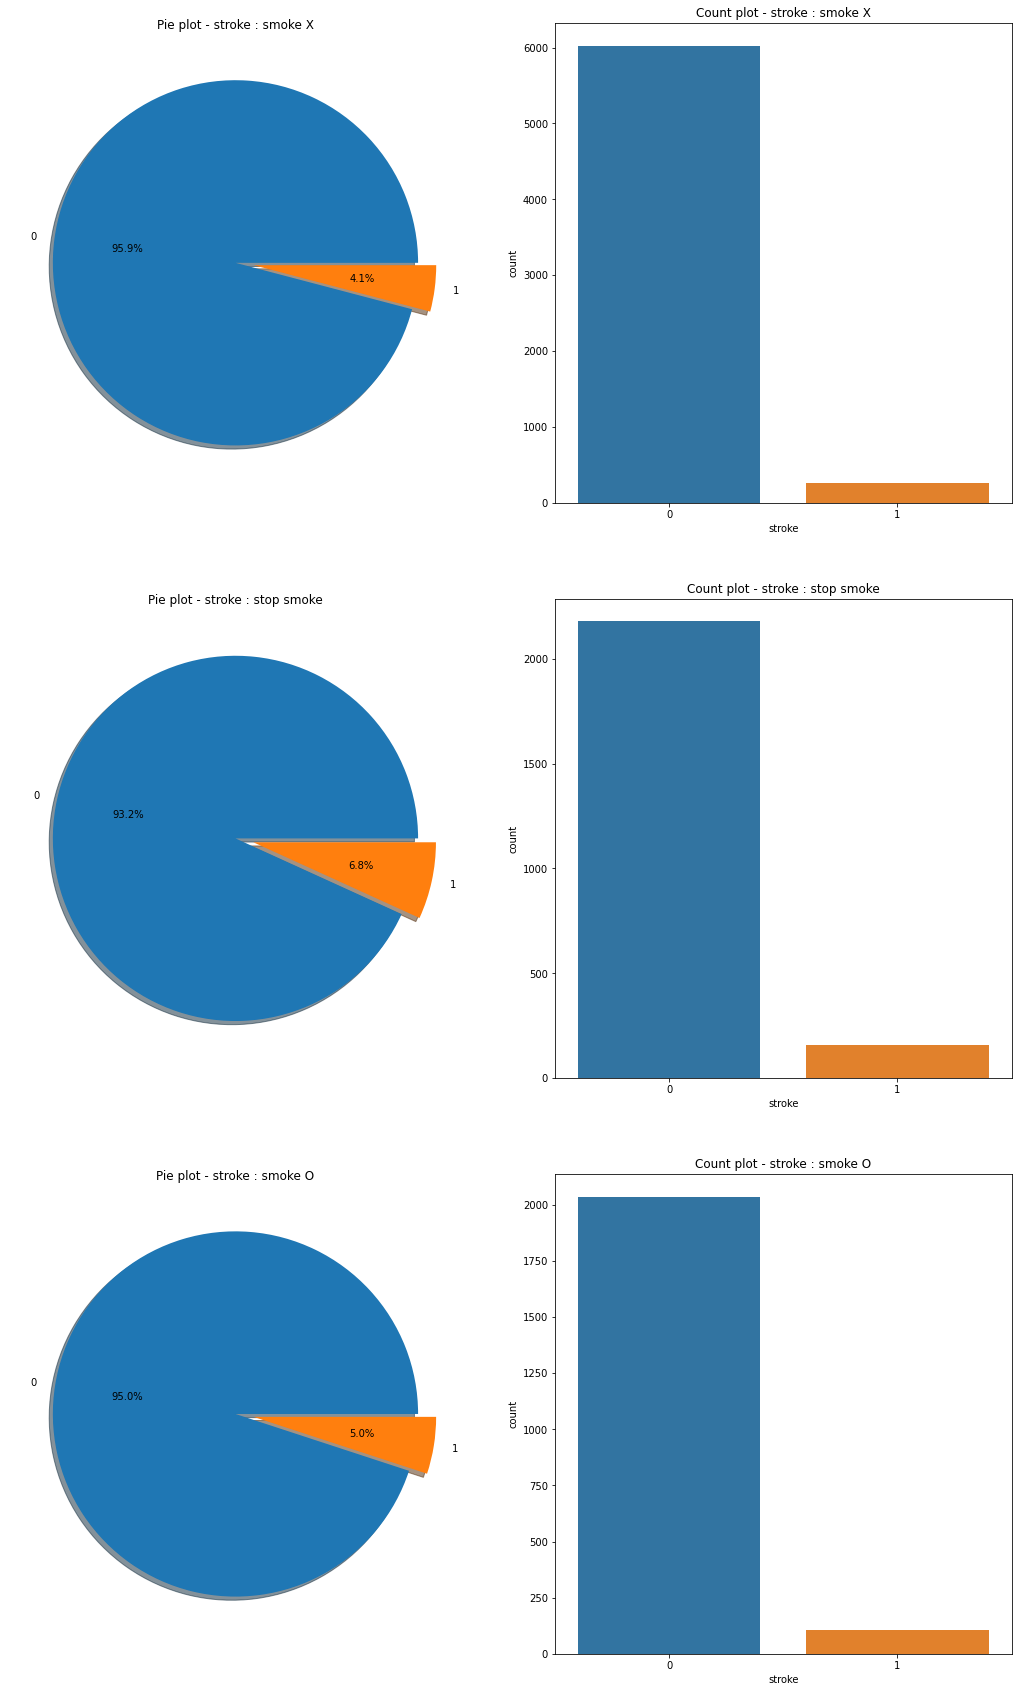

In [ ]:
f, ax = plt.subplots(3, 2, figsize = (18, 30))


df_no_smoke['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0,0], shadow = True)
ax[0,0].set_title('Pie plot - stroke : smoke X')
ax[0,0].set_ylabel('')
sns.countplot('stroke', data = df_no_smoke, ax = ax[0,1])
ax[0,1].set_title('Count plot - stroke : smoke X')

df_stop_smoke['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[1,0], shadow = True)
ax[1,0].set_title('Pie plot - stroke : stop smoke')
ax[1,0].set_ylabel('')
sns.countplot('stroke', data = df_stop_smoke, ax = ax[1,1])
ax[1,1].set_title('Count plot - stroke : stop smoke')

df_smoke['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[2,0], shadow = True)
ax[2,0].set_title('Pie plot - stroke : smoke O')
ax[2,0].set_ylabel('')
sns.countplot('stroke', data = df_smoke, ax = ax[2,1])
ax[2,1].set_title('Count plot - stroke : smoke O')

plt.show()

In [ ]:
df_stroke[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index=False).mean().sort_values(by='stroke', ascending = False)

,smoking_status,stroke
1,formerly smoked,0.068036
3,smokes,0.050397
2,never smoked,0.040917
0,Unknown,0.023773


In [ ]:
pd.crosstab(df_stroke['smoking_status'], df_stroke['stroke'], margins = True)

stroke,0,1,All
smoking_status,,,
Unknown,4435,108,4543
formerly smoked,2178,159,2337
never smoked,6024,257,6281
smokes,2035,108,2143
All,14672,632,15304


* 총 15304개 데이터
    * 흡연 x : 6281 -> 257명 뇌졸중 :4.1%
    * 금연 : 2337 -> 159명 뇌졸중 : 6.8%
    * 흡연 o : 2143 -> 108명 뇌졸중 : 5.0%
    * 결측값 : 4543
* **결론 : 결측값을 제외하고 살펴보면 담배를 펴본적이 있거나 피는 중인 사람들이 뇌졸중일 확률이 조금 높았다. 하지만 결측값이 담배를 펴본적이 있는 사람들 데이터보다 많기 때문에 단정짓기 어렵다.**

## 3.12 heatmap

* heatmap을 그리기 위해서 우선 수치형 변수들로만 구성되어 있는 데이터를 만들어야 한다.

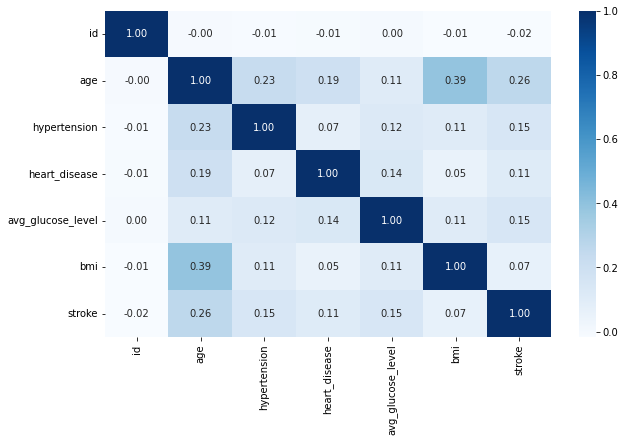

In [ ]:
# 수치형 변수들로 구성되어 있는 데이터
df_numeric = df_stroke[['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
  
plt.figure(figsize = (10,6))
sns.heatmap(df_numeric.corr(), cmap = 'Blues', annot = True, fmt = ".2f")

# 4. 모델링

In [27]:
df_stroke = pd.read_csv('/content/drive/MyDrive/data/stroke/train.csv')
df_stroke2 = pd.read_csv('/content/drive/MyDrive/data/stroke/test.csv')

## 4.1 랜덤포레스트

### 1번

In [28]:
# 데이터가 숫자인 변수만 가져오기
df_train = df_stroke.loc[:,['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
df_test = df_stroke2.loc[:, ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

# train 데이터 X, y 분리
X_train = df_train.drop('stroke', axis = 1)
y_train = df_train[['stroke']]


# 모델링
model = RandomForestClassifier(n_estimators = 10, max_depth = 4, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(df_test)

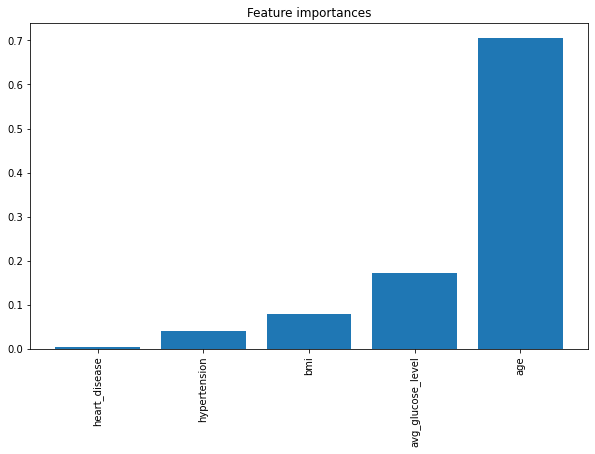

In [29]:
# 모델링에 사용된 변수들의 중요도 시각화
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure(figsize = (10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_train.columns[indices_sorted], rotation = 90)
plt.show()

### 2번

In [31]:
# 데이터가 문자형인 데이터 one-hot-encoding 처리
one_hot_encoded_df_train = pd.get_dummies(data = df_stroke, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
one_hot_encoded_df_test = pd.get_dummies(data = df_stroke2, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])

# train 데이터 X, y 분리
X_train = one_hot_encoded_df_train.drop('stroke', axis = 1)
y_train = one_hot_encoded_df_train[['stroke']]

# 그리드서치를 하기 위한 여러 파라미터 설정
hyper_parameter = {
    'n_estimators' : [10, 20, 50],
    'max_depth' : [2, 3, 4]
}

# 그리드 서치로 최적의 파라미터 찾기
model = RandomForestClassifier()
hyper_parameter_tuner = GridSearchCV(model, hyper_parameter, cv = 5)
hyper_parameter_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4], 'n_estimators': [10, 20, 50]})

In [32]:
hyper_parameter_tuner.best_params_

{'max_depth': 2, 'n_estimators': 20}

In [34]:
model2 = RandomForestClassifier(n_estimators = 20, max_depth = 2, random_state = 42)
model2.fit(X_train, y_train)
predictions = model2.predict(one_hot_encoded_df_test)

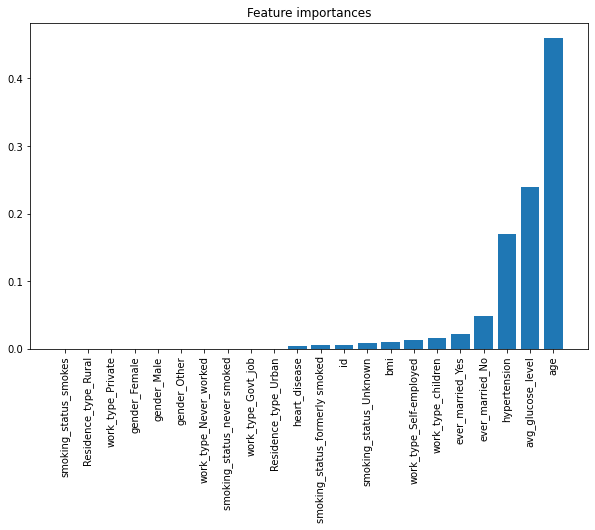

In [36]:
# 모델링에 사용된 변수들의 중요도 시각화
importances = model2.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure(figsize = (10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_train.columns[indices_sorted], rotation = 90)
plt.show()

# 제출용 파일 만들기

In [35]:
# 제출용 파일 만들기
sub = pd.read_csv('/content/drive/MyDrive/data/stroke/sample_submission.csv')

sub['stroke'] = predictions
sub.to_csv('/content/drive/MyDrive/data/stroke/sample_submission.csv', index = False)